<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contexte-et-objectifs-de-l'étude." data-toc-modified-id="Contexte-et-objectifs-de-l'étude.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contexte et objectifs de l'étude.</a></span><ul class="toc-item"><li><span><a href="#Bâtiment-et-énergie:" data-toc-modified-id="Bâtiment-et-énergie:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Bâtiment et énergie:</a></span></li><li><span><a href="#Objectifs:" data-toc-modified-id="Objectifs:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectifs:</a></span></li></ul></li><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import packages</a></span></li><li><span><a href="#Phase-exploratoire." data-toc-modified-id="Phase-exploratoire.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Phase exploratoire.</a></span><ul class="toc-item"><li><span><a href="#Chargement-data" data-toc-modified-id="Chargement-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Chargement data</a></span></li><li><span><a href="#Format-dataset,-données-manquantes" data-toc-modified-id="Format-dataset,-données-manquantes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Format dataset, données manquantes</a></span><ul class="toc-item"><li><span><a href="#Histograme-target" data-toc-modified-id="Histograme-target-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Histograme target</a></span></li><li><span><a href="#Dépendance-des-variables-numériques." data-toc-modified-id="Dépendance-des-variables-numériques.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Dépendance des variables numériques.</a></span></li><li><span><a href="#Question-de-la-qualité-des-données-pour-le-dataset-&quot;numerical&quot;." data-toc-modified-id="Question-de-la-qualité-des-données-pour-le-dataset-&quot;numerical&quot;.-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Question de la qualité des données pour le dataset "numerical".</a></span><ul class="toc-item"><li><span><a href="#Pour-les-colonnes-numériques-pour-lesquelles-on-a-des-valeurs-manquantes,-quelle-est-la-distribution-des-données-?" data-toc-modified-id="Pour-les-colonnes-numériques-pour-lesquelles-on-a-des-valeurs-manquantes,-quelle-est-la-distribution-des-données-?-3.2.3.1"><span class="toc-item-num">3.2.3.1&nbsp;&nbsp;</span>Pour les colonnes numériques pour lesquelles on a des valeurs manquantes, quelle est la distribution des données ?</a></span></li></ul></li><li><span><a href="#Question-de-la-dimension-de-la-matrice" data-toc-modified-id="Question-de-la-dimension-de-la-matrice-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Question de la dimension de la matrice</a></span></li></ul></li></ul></li></ul></div>

## Contexte et objectifs de l'étude.
### Bâtiment et énergie: 
- Le secteur du bâtiment représente 44 % de l’énergie consommée en France, loin devant le secteur des transports (31,3%). Chaque année, le secteur du bâtiment émet plus de 123 millions de tonnes de C02, ce qui en fait l’un des domaines clé dans la lutte contre le réchauffement climatique et la transition énergétique. Pour rendre le bâtiment plus économe en énergie, il faut rénover massivement l’existant et développer des normes plus strictes en termes de consommation d’énergie pour les bâtiments neufs. C’est l’objet de la politique de l’énergie dans les bâtiments. (https://www.ecologie.gouv.fr/energie-dans-batiments). Dans ce contexte de réduction drastique de la consommation énergétique des bâtiments et de la réduction tout aussi sévère des émissions de CO2, ainsi que du renchérissement du coût de l'énergie la ville a depuis plusieurs années procédé à des relevés de mesures.
- Celles-ci sont couteuses. A partir de ces relevés, existe t-il des techniques fiables permettant d'estimer la consommation et les niveaux d'émissions pour des bâtiments non destinés à l'habitation et pour lesquels on n'a pas de mesures ?
- Les relevés fournis concernent des données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)
- Dans cette étude, on s'intéresse également à la mesure "Energy star score" pour la prédiction d'émissions. Mesure d'une approche fastidieuse et l'on cherchera à juger de son intérêt.

### Objectifs:
- Réaliser une courte analyse exploratoire.
- Tester différents modèles de prédiction afin de répondre au mieux à la problématique.


## Import packages

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, f_regression

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor


## Phase exploratoire.

### Chargement data

In [2]:
path= '/Users/olivierdebeyssac/Open Classrooms/Data_scientist/Projet_4_Anticipez_les_besoins_en_consommation_de_bâtiments/Data/2016_Building_Energy_Benchmarking.csv'
df = pd.read_csv (path, sep=',')

In [3]:
df.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


In [4]:
df.loc[:, 'BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [5]:
df.loc[:, 'PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [6]:
df.groupby(['BuildingType', 'PrimaryPropertyType']).count()

OSEBuildingID  DataYear  \
BuildingType         PrimaryPropertyType                                    
Campus               K-12 School                              4         4   
                     Large Office                             1         1   
                     Low-Rise Multifamily                     1         1   
                     Mixed Use Property                       4         4   
                     Other                                    7         7   
                     Restaurant                               1         1   
                     University                               6         6   
Multifamily HR (10+) High-Rise Multifamily                  105       105   
                     Hotel                                    1         1   
                     Other                                    1         1   
                     Senior Care Community                    3         3   
Multifamily LR (1-4) Low-Rise Multifamily                   984       984   
                     Mid-Rise Multifamily                     1         1   
                     Mixed Use Property                      11        11   
                     Other                                    4         4   
                     Senior Care Community                   16        16   
                     Small- and Mid-Sized Office              1         1   
                     University                               1         1   
Multifamily MR (5-9) Mid-Rise Multifamily                   563       563   
                     Mixed Use Property                       8         8   
                     Other                                    1         1   
                     Residence Hall                           2         2   
                     Senior Care Community                    6         6   
NonResidential       Distribution Center                     51        51   
                     Hospital                                10        10   
                     Hotel                                   76        76   
                     K-12 School                             39        39   
                     Laboratory                              10        10   
                     Large Office                           168       168   
                     Low-Rise Multifamily                     2         2   
                     Medical Office                          38        38   
                     Mixed Use Property                     102       102   
                     Other                                  185       185   
                     Refrigerated Warehouse                  12        12   
                     Residence Hall                          21        21   
                     Restaurant                              11        11   
                     Retail Store                            91        91   
                     Self-Storage Facility                   28        28   
                     Senior Care Community                   20        20   
                     Small- and Mid-Sized Office            288       288   
                     Supermarket / Grocery Store             40        40   
                     University                              17        17   
                     Warehouse                              180       180   
                     Worship Facility                        71        71   
Nonresidential COS   Distribution Center                      2         2   
                     Large Office                             4         4   
                     Medical Office                           1         1   
                     Mixed Use Property                       8         8   
                     Office                                   3         3   
                     Other                                   56        56   
                     Small- and Mid-Sized Offi

In [93]:
# Nomenclature des bâtiments à usage non habitation (à partir de variable "BuildingType").
non_residential = ['NonResidential', 'Nonresidential COS','SPS-District K-12', 'Campus','Nonresidential WA']


### Format dataset, données manquantes

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [95]:
df.isnull().mean()*100

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.266588
LargestPropertyUseType            

In [96]:
df_null = pd.DataFrame(df.isnull().mean()*100)
df_null = df_null.transpose()

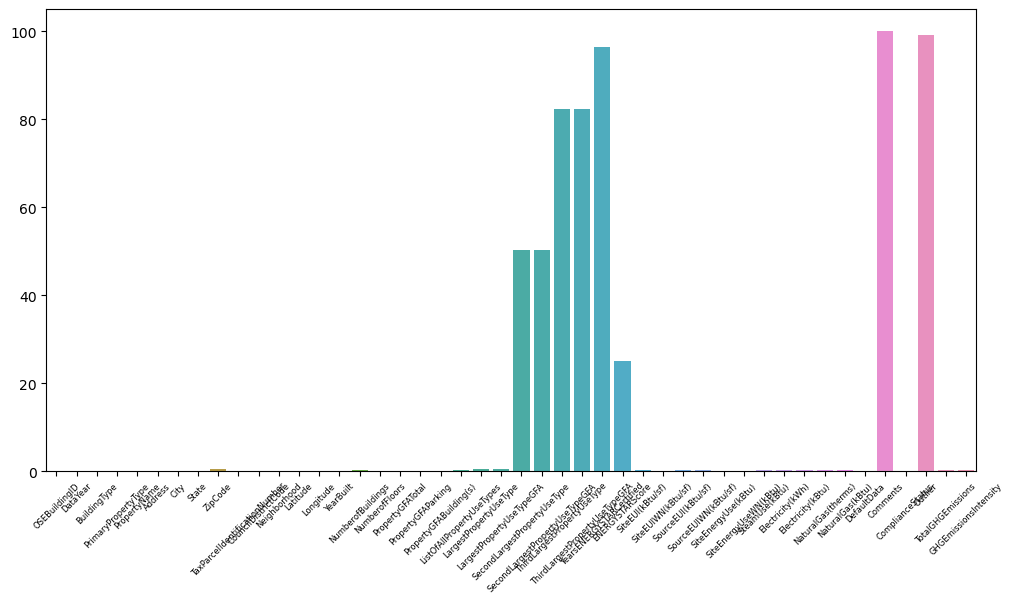

In [97]:
fig, axes = plt.subplots(1,1, figsize=(12,6))
plt.xticks(fontsize=6, rotation=45)
sns.barplot(df_null)
plt.show()




In [98]:
print("Nb colonnes float64: {}".format(len(df.select_dtypes('float64').columns)))
print()
print("Nb colonnes int64: {}".format(len(df.select_dtypes('int64').columns)))
print()
print("Nb colonnes object: {}".format(len(df.select_dtypes('object').columns)))
print()
print("Nb colonnes bool: {}".format(len(df.select_dtypes('boolean').columns)))

Nb colonnes float64: 22

Nb colonnes int64: 8

Nb colonnes object: 15

Nb colonnes bool: 1


#### Histograme target

In [99]:
print("Label, val. moy: {}".format(df['SiteEUI(kBtu/sf)'].mean()))
print()
print("Label, val. médiane: {}".format(df['SiteEUI(kBtu/sf)'].median()))
print()
print("Label, val. max: {}".format(df['SiteEUI(kBtu/sf)'].max()))
print()
print("Label, val. min: {}".format(df['SiteEUI(kBtu/sf)'].min()))
print()
print("Label, val. variance: {}".format(df['SiteEUI(kBtu/sf)'].var()))
print()
print("Label, val. écart type: {}".format(df['SiteEUI(kBtu/sf)'].std()))

Label, val. moy: 54.732116399095844

Label, val. médiane: 38.59999847

Label, val. max: 834.4000244

Label, val. min: 0.0

Label, val. variance: 3166.664495211066

Label, val. écart type: 56.27312409322114


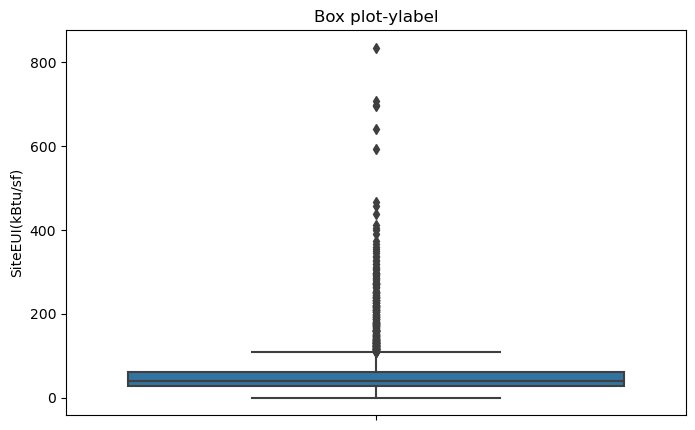

In [100]:
fig, axes = plt.subplots(1, 1, figsize=(8,5))
data= df
target= df.loc[:,['SiteEUI(kBtu/sf)']]

sns.boxplot(y='SiteEUI(kBtu/sf)',data=data,ax=axes)
plt.title('Box plot-ylabel')
plt.show()

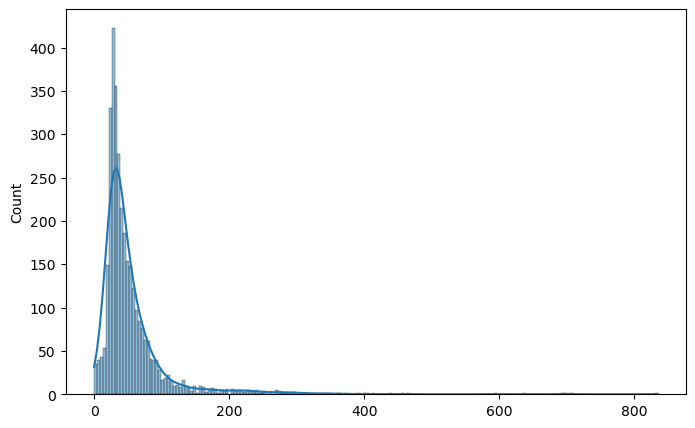

In [101]:
fig, axes = plt.subplots(1, 1, figsize=(8,5))
data= df
target= df.loc[:,['SiteEUI(kBtu/sf)']]

sns.histplot(x=target.values.ravel(),kde=True, ax=axes)
plt.show()

#### Dépendance des variables numériques.

Il y a deux raisons pour exclure certaines variables:
- Des variables qui ne varient pas
- Des variables (features) qui sont corellées entre elles et "disent" à peu près la même chose. Elles sont redondantes et n'apportent pas plus d'information au modèle pour caractériser le label "y".
A partir de ce rationnel, on va exclure les features qui sont concernées.




La variable "y" (target) est fortement corrélée aux variables "SiteEUIWN(KBtu/sf)", "SourceEUI(KBtu/sf)", "SourceEUIWN(KBtu/sf)". Ce sont des variables dépendantes de la variable "y" qu'il faut exclure de l'analyse, le risque étant que le modèle ne sache pas interpréter le lien de dépendance.

In [102]:
dropped_1 = ['DataYear', 'ZipCode', 'CouncilDistrictCode', 'OSEBuildingID','Comments', 'Outlier', 'DefaultData']

In [103]:
# Suppression colonnes "Comments" et "Outlier", ..., inutiles dans la suite des analyses.
df_temp = df.drop(dropped_1, axis=1)

In [104]:
# Numerical dataset
numerical_features = df_temp.loc[:, df_temp.dtypes != 'object']
print(numerical_features.shape)

(3376, 25)


In [105]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Latitude                         3376 non-null   float64
 1   Longitude                        3376 non-null   float64
 2   YearBuilt                        3376 non-null   int64  
 3   NumberofBuildings                3368 non-null   float64
 4   NumberofFloors                   3376 non-null   int64  
 5   PropertyGFATotal                 3376 non-null   int64  
 6   PropertyGFAParking               3376 non-null   int64  
 7   PropertyGFABuilding(s)           3376 non-null   int64  
 8   LargestPropertyUseTypeGFA        3356 non-null   float64
 9   SecondLargestPropertyUseTypeGFA  1679 non-null   float64
 10  ThirdLargestPropertyUseTypeGFA   596 non-null    float64
 11  ENERGYSTARScore                  2533 non-null   float64
 12  SiteEUI(kBtu/sf)    

Quelles sont les features explicatives qui sont fortement corrélées entre elles ? Calcul du "VIF" (Variance Inflation factor)

In [120]:
# Calcul VIF

def calculate_vif(dataset):
    dataset_ = dataset.fillna(dataset.median())
    vif = pd. DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Value'] = [variance_inflation_factor (dataset_.values, i) for i in range (dataset_.shape[1])]
    vif.sort_values('VIF_Value', ascending=False, inplace=True)
    return vif

In [121]:
features = numerical_features.iloc[:,:-1]
calculate_vif(features)

/Users/olivierdebeyssac/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF_Value
5,PropertyGFATotal,inf
6,PropertyGFAParking,inf
7,PropertyGFABuilding(s),inf
19,Electricity(kWh),3.002400e+15
22,NaturalGas(kBtu),3.002400e+15
21,NaturalGas(therms),3.002400e+15
20,Electricity(kBtu),3.002400e+15
23,TotalGHGEmissions,1.598819e+06
0,Latitude,9.711999e+05
1,Longitude,9.622299e+05


Plusieurs features explicatives sont fortement corréles entre elles. Cas de PropertyGFATotal, Electricity(kWh), NaturalGas(therms)

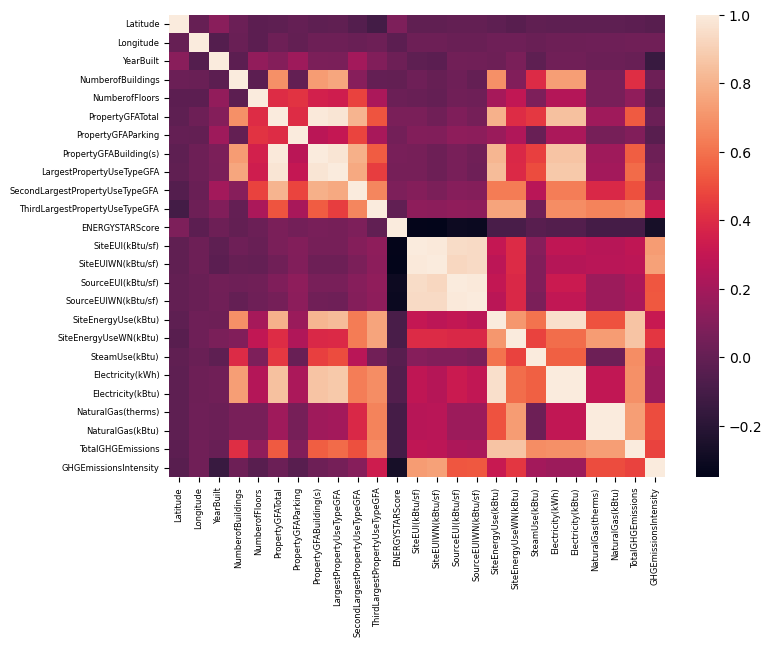

In [122]:
corr_ = numerical_features.corr()
fig, axes = plt.subplots(1,1, figsize=(8,6))
plt.xticks(fontsize=6, rotation=45)
plt.yticks(fontsize=6, rotation=45)

sns.heatmap(corr_, ax= axes)
plt.show()

Suppression des features numériques fortement corrélées entre elles.

In [123]:
dropped_2=['PropertyGFATotal','SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'Electricity(kWh)',
          'NaturalGas(therms)']

In [124]:
# Suppression des features fortement corrélées entre elles.
numerical_features = numerical_features.loc[:,~numerical_features.columns.isin(dropped_2)]

In [125]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Latitude                         3376 non-null   float64
 1   Longitude                        3376 non-null   float64
 2   YearBuilt                        3376 non-null   int64  
 3   NumberofBuildings                3368 non-null   float64
 4   NumberofFloors                   3376 non-null   int64  
 5   PropertyGFAParking               3376 non-null   int64  
 6   PropertyGFABuilding(s)           3376 non-null   int64  
 7   LargestPropertyUseTypeGFA        3356 non-null   float64
 8   SecondLargestPropertyUseTypeGFA  1679 non-null   float64
 9   ThirdLargestPropertyUseTypeGFA   596 non-null    float64
 10  ENERGYSTARScore                  2533 non-null   float64
 11  SiteEUI(kBtu/sf)                 3369 non-null   float64
 12  SourceEUI(kBtu/sf)  

###### Visualisation des variables explicatives et variable expliquée, y.

In [18]:
# Visualisation.
l_features = numerical_features.columns

def vis(df,l):
    
    x_features = l_features[0:-1]
    label = 'SiteEUI(kBtu/sf)'
    
    x = df.loc[:,x_features]
    y = df[label]
    
    nb = len(x_features)
    nb_cols = 3
    
    if nb%nb_cols !=0:
        nb_rows = (nb//nb_cols) + 1
    else:
        nb_rows = (nb//nb_cols)
    
        
    fig, axes = plt.subplots(nb_rows, nb_cols, figsize=(8, 15))
    plt.tight_layout(pad=4.0)
    
        
    for j, ax in enumerate(axes.flat):
        diff = (nb_rows * nb_cols) - nb
        col_name = x.columns[j - diff]
        s = x.loc[:, col_name]
        
        sns.scatterplot(x=s,y=y, ax=ax)
        
        ax.set_xlabel(col_name,fontsize=7)
        ax.set_ylabel(label,fontsize=7)
    
        
        # ax.set_xticklabels(s, fontsize=6)
        # ax.set_yticklabels(y, fontsize=6)
        
    plt.show()
            
    return
        

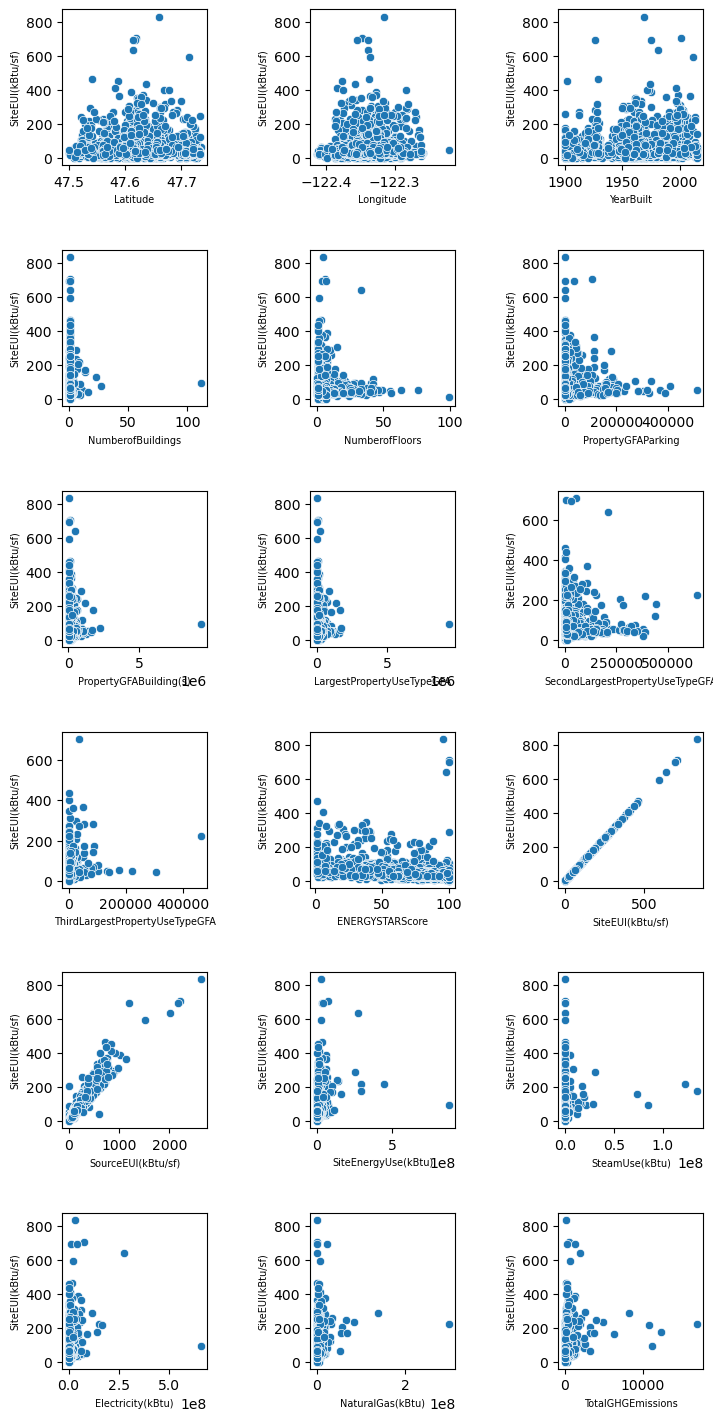

In [19]:
vis(numerical_features, l_features)

Certaines features ont une propension à expliquer le label. C'est le cas de "PropertyGFAParking", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA", "SourceEUI(kBtu/sf)" par exemple.

#### Question de la qualité des données pour le dataset "numerical".

##### Pour les colonnes numériques pour lesquelles on a des valeurs manquantes, quelle est la distribution des données ? 
- Est ce que les données sont assez concentrées ? Si c'est le cas, on remplacera les valeurs manquantes par la moyenne
- Si les données ne sont pas concentrées, on remplacera les valeurs par la médiane.
- Commençons par tracer les boxplots pour chacune des colonnes numériques avec val. manquantes.

In [20]:
def extract_cols(df):
    l = []
    for i in range(len(df.columns)):
        serie = df.iloc[:, i]
        if serie.dtype == 'int64' or serie.dtype == 'float64':
            if serie.count() < len(df):
                l.append(serie)
    return l

       

In [21]:
l = extract_cols(numerical_features)

In [22]:
l_series = pd.DataFrame(l)
print(l_series.shape)

(13, 3376)


In [23]:
l_series = l_series.transpose()

In [24]:
l_series.head()

,NumberofBuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1.0,88434.0,NaN,NaN,60.0,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,249.98,2.83
1,1.0,83880.0,15064.0,4622.0,61.0,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,295.86,2.86
2,1.0,756493.0,NaN,NaN,43.0,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,2089.28,2.19
3,1.0,61320.0,NaN,NaN,56.0,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,286.43,4.67
4,1.0,123445.0,68009.0,0.0,75.0,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,505.01,2.88


In [25]:
def affiche(df):
    print(len(df.columns))
    if len(df.columns)%2 == 0:
        n_rows = int(len(df.columns)/4)
        n_cols = 4
        
    else:
        n_rows = int(len(df.columns)/3)
        n_cols = int(len(df.columns)/n_rows) + 1
        
        #print(n_rows)
        #print(n_cols)
        

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10,12))
    plt.tight_layout(pad=3.0)
    
    for ligne, ax in enumerate(axes.flatten()):
        sns.boxplot(y=df.iloc[:,ligne-3], ax=ax)
        ax.set_ylabel(df.columns[ligne-3],fontsize=7)
        ax.tick_params(labelsize=6)

    plt.show()
    return

13


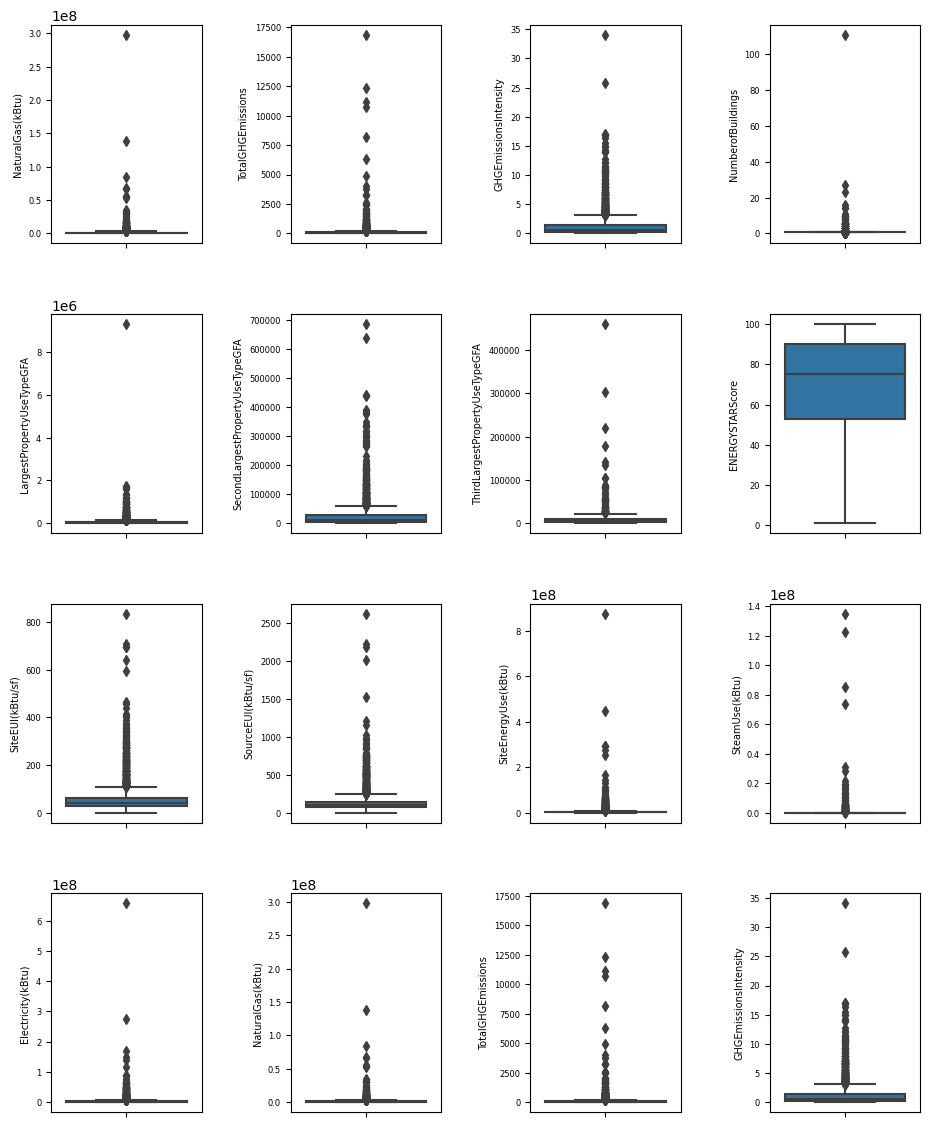

In [26]:
affiche(l_series)

    Pour les colonnes numériques ayant des valeurs manquantes on peut remplacer par la valeurs médiane des features

In [27]:
numerical_features.isna().mean()*100

Latitude                            0.000000
Longitude                           0.000000
YearBuilt                           0.000000
NumberofBuildings                   0.236967
NumberofFloors                      0.000000
PropertyGFAParking                  0.000000
PropertyGFABuilding(s)              0.000000
LargestPropertyUseTypeGFA           0.592417
SecondLargestPropertyUseTypeGFA    50.266588
ThirdLargestPropertyUseTypeGFA     82.345972
ENERGYSTARScore                    24.970379
SiteEUI(kBtu/sf)                    0.207346
SourceEUI(kBtu/sf)                  0.266588
SiteEnergyUse(kBtu)                 0.148104
SteamUse(kBtu)                      0.266588
Electricity(kBtu)                   0.266588
NaturalGas(kBtu)                    0.266588
TotalGHGEmissions                   0.266588
GHGEmissionsIntensity               0.266588
dtype: float64

In [28]:
numerical_features = numerical_features.fillna(numerical_features.median())

In [29]:
numerical_features.isna().any()

Latitude                           False
Longitude                          False
YearBuilt                          False
NumberofBuildings                  False
NumberofFloors                     False
PropertyGFAParking                 False
PropertyGFABuilding(s)             False
LargestPropertyUseTypeGFA          False
SecondLargestPropertyUseTypeGFA    False
ThirdLargestPropertyUseTypeGFA     False
ENERGYSTARScore                    False
SiteEUI(kBtu/sf)                   False
SourceEUI(kBtu/sf)                 False
SiteEnergyUse(kBtu)                False
SteamUse(kBtu)                     False
Electricity(kBtu)                  False
NaturalGas(kBtu)                   False
TotalGHGEmissions                  False
GHGEmissionsIntensity              False
dtype: bool

#### Question de la dimension de la matrice

Dans les étapes précédentes, on a regardé si les variables indépendantes étaient corrélées entre elles. Certaines variables étaient corrélées, on les a exclues pour ne pas perturber l'analyse. On peut maintenant se demander si il est opportun de réduire la dimension de cette matrice pour simplifier notre analyse.

In [126]:
# Construction pipeline: remplacement Nan/imputation et centrage data
pipe = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'), 
              StandardScaler())


In [127]:
# Chaine de transformation:
preprocessor_pca = make_column_transformer((pipe, numerical_features.columns), remainder='passthrough')

In [128]:
# Application PCA(). Détermination du nombre de composantes pour obtenir une variance de 0.85
estimator = PCA(n_components=0.90)

In [129]:
model_pca = make_pipeline(preprocessor_pca,estimator)

In [130]:
model_pca.fit_transform(numerical_features)

array([[ 0.54605191, -0.85483302,  0.26328418, ...,  0.67143317,
         1.08703824,  0.93655603],
       [ 0.70444158, -0.971564  , -0.6319059 , ...,  0.23517474,
        -0.26490563,  1.2044892 ],
       [ 9.11144054,  1.8897386 , -2.3532248 , ...,  5.00484305,
         2.05231192,  1.83017331],
       ...,
       [ 2.43916603, -9.75963047,  1.49631042, ...,  0.15070667,
        -0.75500146,  1.35246357],
       [-0.7709656 , -0.17952782,  0.42710303, ..., -0.05959293,
        -1.86201027,  0.08745701],
       [-0.64179257, -0.65063417,  0.85364105, ...,  0.01670306,
        -0.93815877, -0.02056273]])

In [131]:
# Projection des features sur les composantes principales.
print(estimator.components_)

[[-1.26426092e-02  1.62397231e-02  2.79336814e-02  2.61726481e-01
   1.31703904e-01  1.20858660e-01  3.46798154e-01  3.51551383e-01
   2.22443541e-01  1.62793851e-01 -2.74842708e-02  1.46770441e-01
   1.40143302e-01  3.92316040e-01  2.44442673e-01  3.75325345e-01
   2.03944036e-01  3.43974658e-01  1.48729019e-01]
 [ 2.92510547e-02 -2.66393490e-02  7.63269235e-02  2.11222667e-01
   1.22971782e-01  7.48772342e-02  2.41669706e-01  2.39937148e-01
   4.50242910e-02 -8.83231363e-02  2.08933281e-01 -5.00241692e-01
  -4.45567874e-01  1.64753873e-02  6.84658919e-02  8.57261677e-02
  -2.51068571e-01 -1.11198031e-01 -4.70456145e-01]
 [ 5.33217949e-03  4.07196618e-02 -2.48976211e-01  3.54395706e-01
  -3.92852203e-01 -4.26854143e-01  3.74007549e-02  7.00300775e-02
  -4.49316957e-01 -3.70159561e-01 -8.01022393e-02  5.03713077e-02
   2.29129564e-02  1.04444173e-01  2.33779461e-01  1.20266315e-01
  -1.84252311e-01  3.22673843e-02  6.70051566e-02]
 [-9.20640504e-02  5.35272762e-02 -2.22972944e-01 -6.57

In [132]:
print(estimator.get_feature_names_out())

['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9']


In [133]:
# Variance conservée après réduction de dimension
print(estimator.explained_variance_)

[6.08271543 2.6720287  1.983352   1.47697498 1.09133929 1.00194533
 0.92988651 0.82804909 0.80413591 0.59188218]


In [134]:
cum_var = np.cumsum(estimator.explained_variance_)
print(cum_var)

[ 6.08271543  8.75474414 10.73809614 12.21507112 13.30641041 14.30835574
 15.23824225 16.06629134 16.87042725 17.46230943]


In [135]:
# Taux de variance conservée après réduction de dimension
print(estimator.explained_variance_ratio_)

[0.32004809 0.14059143 0.10435603 0.0777125  0.0574219  0.05271834
 0.0489269  0.04356862 0.04231041 0.03114247]


In [136]:
cum_var_ratio = np.cumsum(estimator.explained_variance_ratio_)
print(cum_var_ratio)

[0.32004809 0.46063952 0.56499555 0.64270805 0.70012994 0.75284829
 0.80177519 0.84534381 0.88765422 0.91879668]


In [137]:
# Taux de variance conservée après réduction de dimension
print(estimator.n_features_in_)


19


       valeurs
pca0  0.320048
pca1  0.460640
pca2  0.564996
pca3  0.642708
pca4  0.700130
pca5  0.752848
pca6  0.801775
pca7  0.845344
pca8  0.887654
pca9  0.918797


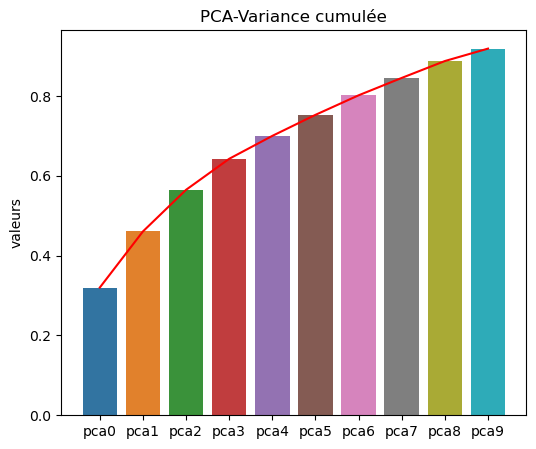

In [139]:
x= estimator.get_feature_names_out()
y= cum_var_ratio
df_pca = pd.DataFrame({'valeurs':y}, index=x)
print(df_pca)

fig, axes = plt.subplots(1,1, figsize=(6,5))
sns.barplot(x=df_pca.index, y='valeurs', data=df_pca)
plt.title('PCA-Variance cumulée')
sns.lineplot(x=df_pca.index, y='valeurs', data=df_pca, c='red')
plt.show()

Pour atteindre 90% de la variance initiale, il faut 9 composantes principales. On pourrait retenir cette méthode de sélection des features. Mais on va explorer d'autres méthodes pour pouvoir connaitre les features qui exercent une influence sur le label. On préfère faire une sélection de features en se basant soit sur VarianceThrehold ,soit sur KBest. On étudie ci-après les deux méthodes.